In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 50)

In [2]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')

In [3]:
june_data = pd.concat([df1,df2,df3,df4], ignore_index = True)
june_data.rename(columns={'EXITS                                                               ':"CU_EXITS", \
                          'ENTRIES': 'CU_ENTRIES'}, inplace=True)
june_data['DateTime'] = pd.to_datetime(june_data['DATE'] + ' ' + june_data['TIME'])

In [4]:
jd_daily = (june_data.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[['CU_ENTRIES','CU_EXITS']].last())

In [5]:
jd_daily[['ENTRIES','EXITS']] = (jd_daily
                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])[[ "CU_ENTRIES", 'CU_EXITS']]
                                        .apply(lambda x: x.subtract(x.shift(1))))


In [6]:
jd_daily.head(20)

,C/A,UNIT,SCP,STATION,DATE,CU_ENTRIES,CU_EXITS,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,06/01/2019,7080817,2399121,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,2399319,750.0,198.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,2399714,1382.0,395.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,2400149,1616.0,435.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,2400691,1544.0,542.0
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,2401210,1548.0,519.0
6,A002,R051,02-00-00,59 ST,06/07/2019,7089268,2401740,1611.0,530.0
7,A002,R051,02-00-00,59 ST,06/08/2019,7090115,2401978,847.0,238.0
8,A002,R051,02-00-00,59 ST,06/09/2019,7090874,2402164,759.0,186.0
9,A002,R051,02-00-00,59 ST,06/10/2019,7092269,2402645,1395.0,481.0


In [7]:
jd_daily.dropna(subset=['ENTRIES', 'EXITS'], inplace = True)

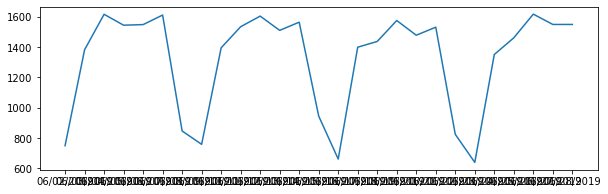

In [8]:
mask = ((jd_daily["C/A"] == "A002") &
        (jd_daily["UNIT"] == "R051") & 
        (jd_daily["SCP"] == "02-00-00") & 
        (jd_daily["STATION"] == "59 ST"))
filtered_jdd = jd_daily[mask]
plt.figure(figsize=(10,3))
plt.plot(filtered_jdd['DATE'],filtered_jdd['ENTRIES'])
plt.show()

In [10]:
jd_daily_CUS = jd_daily.groupby(['SCP','DATE'])[['ENTRIES', 'EXITS']].sum()
jd_daily_CUS

ENTRIES      EXITS
SCP      DATE                            
00-00-00 06/02/2019   309938.0   341315.0
         06/03/2019   632031.0   630419.0
         06/04/2019   623557.0   642185.0
         06/05/2019   607197.0   675508.0
         06/06/2019 -6959067.0 -6047455.0
...                        ...        ...
05-06-01 06/24/2019     1065.0      172.0
         06/25/2019     1083.0      165.0
         06/26/2019     1098.0      166.0
         06/27/2019     1093.0      175.0
         06/28/2019     1025.0      187.0

[5929 rows x 2 columns]

In [11]:
jd_daily_station = jd_daily.groupby(['STATION', 'DATE'])[['ENTRIES', 'EXITS']].sum().reset_index()
print(jd_daily_station.shape)
jd_daily_station

(10195, 4)


,STATION,DATE,ENTRIES,EXITS
0,1 AV,06/02/2019,5803.0,7404.0
1,1 AV,06/03/2019,17040.0,18940.0
2,1 AV,06/04/2019,17433.0,18676.0
3,1 AV,06/05/2019,19434.0,21180.0
4,1 AV,06/06/2019,18639.0,19997.0
...,...,...,...,...
10190,ZEREGA AV,06/24/2019,2704.0,2532.0
10191,ZEREGA AV,06/25/2019,2659.0,2469.0
10192,ZEREGA AV,06/26/2019,2860.0,2730.0
10193,ZEREGA AV,06/27/2019,2634.0,2569.0


In [12]:
jd_daily_station.sort_values('EXITS', ascending = False).head(50)

,STATION,DATE,ENTRIES,EXITS
633,167 ST,06/14/2019,1.819034e+09,1.821603e+09
2179,52 ST,06/27/2019,7.665524e+08,1.712755e+08
7662,MOSHOLU PKWY,06/06/2019,4.511710e+08,6.682965e+07
1055,20 AV,06/05/2019,1.350304e+06,1.910597e+06
1672,34 ST-PENN STA,06/28/2019,1.647490e+05,1.706090e+05
1663,34 ST-PENN STA,06/19/2019,1.747200e+05,1.596200e+05
1662,34 ST-PENN STA,06/18/2019,1.797490e+05,1.595110e+05
1671,34 ST-PENN STA,06/27/2019,1.765120e+05,1.577480e+05
1658,34 ST-PENN STA,06/14/2019,1.620930e+05,1.576860e+05
1650,34 ST-PENN STA,06/06/2019,1.757070e+05,1.573180e+05


In [14]:
cleaning_mask = ((jd_daily_station['ENTRIES'] > 0) & \
                (jd_daily_station['EXITS'] > 0) & \
                (jd_daily_station['ENTRIES'] < 1e6) & \
                (jd_daily_station['EXITS'] < 1e6) )
jd_ds_clean = jd_daily_station[cleaning_mask].copy()
jd_ds_clean                

,STATION,DATE,ENTRIES,EXITS
0,1 AV,06/02/2019,5803.0,7404.0
1,1 AV,06/03/2019,17040.0,18940.0
2,1 AV,06/04/2019,17433.0,18676.0
3,1 AV,06/05/2019,19434.0,21180.0
4,1 AV,06/06/2019,18639.0,19997.0
...,...,...,...,...
10190,ZEREGA AV,06/24/2019,2704.0,2532.0
10191,ZEREGA AV,06/25/2019,2659.0,2469.0
10192,ZEREGA AV,06/26/2019,2860.0,2730.0
10193,ZEREGA AV,06/27/2019,2634.0,2569.0


In [17]:
#make new column with total ridership, entries + exits
jd_ds_clean['TOTAL RIDERSHIP'] = jd_ds_clean['ENTRIES'] + jd_ds_clean['EXITS']

In [18]:
jd_ds_clean

,STATION,DATE,ENTRIES,EXITS,Total Ridership,TOTAL RIDERSHIP
0,1 AV,06/02/2019,5803.0,7404.0,13207.0,13207.0
1,1 AV,06/03/2019,17040.0,18940.0,35980.0,35980.0
2,1 AV,06/04/2019,17433.0,18676.0,36109.0,36109.0
3,1 AV,06/05/2019,19434.0,21180.0,40614.0,40614.0
4,1 AV,06/06/2019,18639.0,19997.0,38636.0,38636.0
...,...,...,...,...,...,...
10190,ZEREGA AV,06/24/2019,2704.0,2532.0,5236.0,5236.0
10191,ZEREGA AV,06/25/2019,2659.0,2469.0,5128.0,5128.0
10192,ZEREGA AV,06/26/2019,2860.0,2730.0,5590.0,5590.0
10193,ZEREGA AV,06/27/2019,2634.0,2569.0,5203.0,5203.0


In [19]:
del jd_ds_clean['Total Ridership']

In [20]:
jd_ds_clean

,STATION,DATE,ENTRIES,EXITS,TOTAL RIDERSHIP
0,1 AV,06/02/2019,5803.0,7404.0,13207.0
1,1 AV,06/03/2019,17040.0,18940.0,35980.0
2,1 AV,06/04/2019,17433.0,18676.0,36109.0
3,1 AV,06/05/2019,19434.0,21180.0,40614.0
4,1 AV,06/06/2019,18639.0,19997.0,38636.0
...,...,...,...,...,...
10190,ZEREGA AV,06/24/2019,2704.0,2532.0,5236.0
10191,ZEREGA AV,06/25/2019,2659.0,2469.0,5128.0
10192,ZEREGA AV,06/26/2019,2860.0,2730.0,5590.0
10193,ZEREGA AV,06/27/2019,2634.0,2569.0,5203.0


In [29]:
jd_ds_clean.groupby(['STATION'])[['TOTAL RIDERSHIP']].median().sort_values('TOTAL RIDERSHIP', ascending=False).head(20)

,TOTAL RIDERSHIP
STATION,
34 ST-PENN STA,322394.5
GRD CNTRL-42 ST,275415.5
34 ST-HERALD SQ,227112.0
23 ST,196952.0
TIMES SQ-42 ST,196770.0
14 ST-UNION SQ,193416.5
FULTON ST,187165.5
42 ST-PORT AUTH,157455.5
86 ST,146461.0


In [63]:
AV1 = jd_daily_station.loc[jd_daily_station['STATION']=='1 AV'].copy()


AV1

,STATION,DATE,ENTRIES,EXITS
0,1 AV,06/02/2019,5803.0,7404.0
1,1 AV,06/03/2019,17040.0,18940.0
2,1 AV,06/04/2019,17433.0,18676.0
3,1 AV,06/05/2019,19434.0,21180.0
4,1 AV,06/06/2019,18639.0,19997.0
5,1 AV,06/07/2019,20257.0,21819.0
6,1 AV,06/08/2019,8450.0,10165.0
7,1 AV,06/09/2019,5882.0,7706.0
8,1 AV,06/10/2019,17396.0,20519.0
9,1 AV,06/11/2019,18648.0,20377.0


In [64]:
AV1['DAY_OF_WEEK'] = pd.to_datetime(AV1['DATE']).dt.day_name()
AV1

,STATION,DATE,ENTRIES,EXITS,DAY_OF_WEEK
0,1 AV,06/02/2019,5803.0,7404.0,Sunday
1,1 AV,06/03/2019,17040.0,18940.0,Monday
2,1 AV,06/04/2019,17433.0,18676.0,Tuesday
3,1 AV,06/05/2019,19434.0,21180.0,Wednesday
4,1 AV,06/06/2019,18639.0,19997.0,Thursday
5,1 AV,06/07/2019,20257.0,21819.0,Friday
6,1 AV,06/08/2019,8450.0,10165.0,Saturday
7,1 AV,06/09/2019,5882.0,7706.0,Sunday
8,1 AV,06/10/2019,17396.0,20519.0,Monday
9,1 AV,06/11/2019,18648.0,20377.0,Tuesday


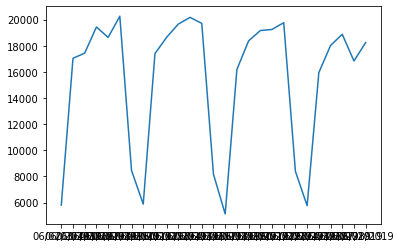

In [28]:
plt.plot(AV1['DATE'],AV1['ENTRIES'])
plt.show()

In [29]:
week_count_list1 = AV1[0:7]['ENTRIES']
week_count_list2 = AV1[7:14]['ENTRIES']
week_count_list3 = AV1[14:21]['ENTRIES']
week_count_list4 = AV1[21:28]['ENTRIES']

In [30]:
week_count_list1

0     5803.0
1    17040.0
2    17433.0
3    19434.0
4    18639.0
5    20257.0
6     8450.0
Name: ENTRIES, dtype: float64

In [31]:
import numpy as np
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

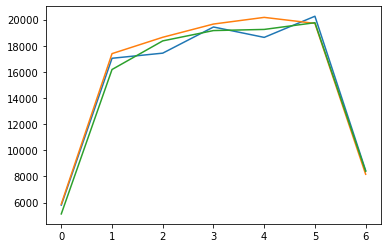

In [32]:
plt.plot(np.arange(7), week_count_list1)
plt.plot(np.arange(7), week_count_list2)

plt.plot(np.arange(7), week_count_list3)




In [49]:
total_ridership_counts = jd_daily_station.groupby(['STATION'])[['ENTRIES']].sum()
total_ridership_counts  

,ENTRIES
STATION,
1 AV,416597.0
103 ST,682153.0
103 ST-CORONA,489853.0
104 ST,73454.0
110 ST,256953.0
...,...
WOODLAWN,171234.0
WORLD TRADE CTR,449387.0
WTC-CORTLANDT,330882.0


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,
          0., 370.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.52863960e+09, -1.49515929e+09, -1.46167897e+09, -1.42819866e+09,
        -1.39471834e+09, -1.36123802e+09, -1.32775771e+09, -1.29427739e+09,
        -1.26079708e+09, -1.22731676e+09, -1.19383645e+09, -1.16035613e+09,
        -1.12687581e+09, -1.09339550e+09, -1.05991518e+09, -1.02643487e+09,
        -9.929

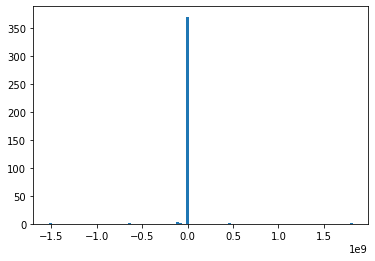

In [52]:
total_ridership_counts.sort_values('ENTRIES')
plt.hist(total_ridership_counts, bins = 100)

In [53]:
total_ridership_counts = total_ridership_counts[(total_ridership_counts >=0) & (total_ridership_counts < .25*1e9)]

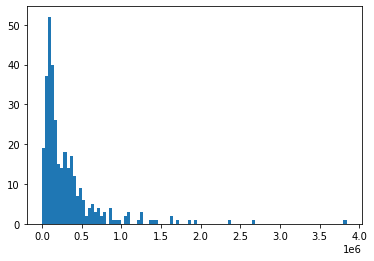

In [54]:
plt.hist(total_ridership_counts, bins = 100)

plt.show()